In [1]:
# Load the libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle
import os 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
def load_model(model_name):
    """Loads model with specified model name"""
    file_name = f'{model_name}.sav'
    model_path = os.path.join(os.path.join(os.getcwd(), 'saved_models'), file_name)
    assert os.path.exists(model_path), f"{file_name} does not exist!"
    try:
        with open(model_path, 'rb') as handle:
            model = pickle.load(handle)
        return model
    except Exception as e:
        raise ValueError('Unable to load model')

In [3]:
# Load saved model for checks
model_name = 'random_forest_2'
rf = load_model(model_name)

In [4]:
# Display number of predictors in Random Forest 
len(rf.estimators_)

500

In [5]:
train_labels = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'train_final.csv'), nrows=0).columns[:-1]
feature_importances = rf.feature_importances_
feature_info = pd.DataFrame({'Feature Name':train_labels,
                             'Feature Importance':feature_importances})
feature_info

,Feature Name,Feature Importance
0,Temperature,0.100342
1,Humidity,0.095890
2,Pressure,0.110168
3,Visibility,0.025756
4,Wind Speed,0.079082
...,...,...
75,State_WV,0.000246
76,State_WY,0.000057
77,Night,0.010218
78,MapQuest,0.037583


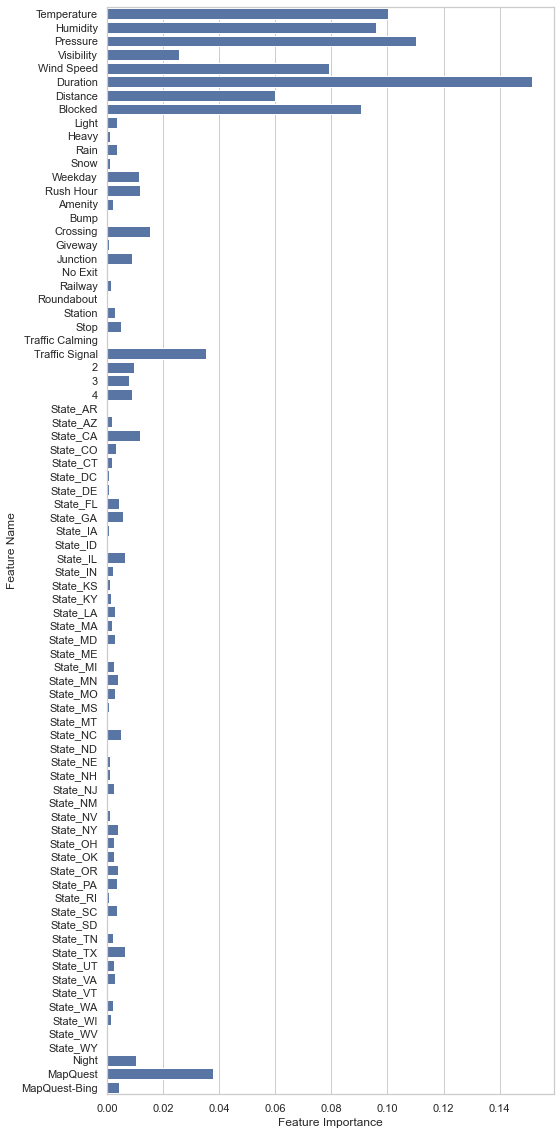

In [6]:
f, ax = plt.subplots(figsize=(8, 20))
sns.barplot(x="Feature Importance", y="Feature Name", data=feature_info, color="b", orient = 'h');